In [ ]:
!pip install scikit-learn
!pip install Keras
!pip install tensorflow


In [ ]:
!pip show keras.utils.vis_utils


In [ ]:
from tensorflow.keras.utils import plot_model


In [ ]:
!pip install keras.utils


In [ ]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
#import Keras


In [ ]:
pip show keras


Name: keras
Version: 2.15.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: keras-utils, tensorflow


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
#from sklearn.Preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM


In [ ]:
#from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model


In [ ]:
df=pd.read_csv("microsoft_stocks.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-12,47.540001,46.360001,47.419998,46.599998,23651900.0,40.786396
2015-01-13,47.910000,46.060001,46.970001,46.360001,35270600.0,40.576340
2015-01-14,46.240002,45.619999,45.959999,45.959999,29719600.0,40.226257
2015-01-15,46.380001,45.410000,46.220001,45.480000,32750800.0,39.806129
2015-01-16,46.279999,45.169998,45.310001,46.240002,35695300.0,40.471313


In [ ]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", df.shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (1925, 6)
Null Value Present:  False


<Axes: xlabel='Date'>

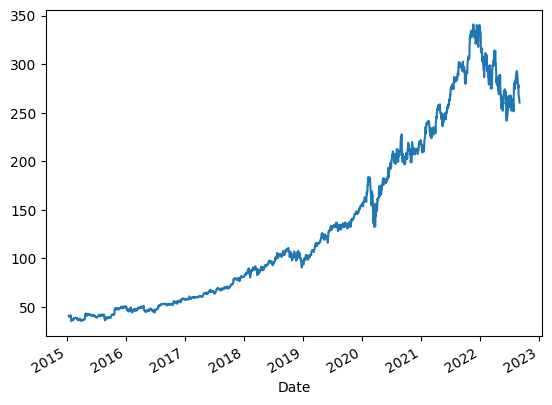

In [ ]:
#Plot the True Adj Close Value
df['Adj Close'].plot()

In [ ]:
#Set Target Variable
output_var = df['Adj Close'].to_frame()
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [ ]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2015-01-12,0.023268,0.022011,0.021952,0.100324
2015-01-13,0.021789,0.023209,0.020960,0.172161
2015-01-14,0.018470,0.017803,0.019505,0.137840
2015-01-15,0.019324,0.018257,0.018811,0.156581
2015-01-16,0.016334,0.017933,0.018018,0.174787


In [ ]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

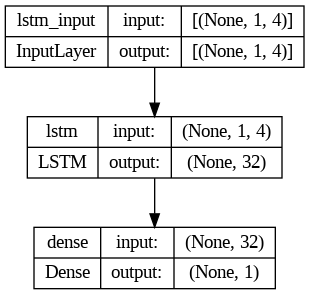

In [ ]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)


Epoch 1/100
219/219 [==============================] - 2s 3ms/step - loss: 19979.2754
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 18540.8574
Epoch 3/100
219/219 [==============================] - 1s 2ms/step - loss: 16317.9707
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 13464.7812
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 10404.2793
Epoch 6/100
219/219 [==============================] - 1s 6ms/step - loss: 7542.8906
Epoch 7/100
219/219 [==============================] - 2s 10ms/step - loss: 5160.4785
Epoch 8/100
219/219 [==============================] - 1s 5ms/step - loss: 3380.3479
Epoch 9/100
219/219 [==============================] - 1s 3ms/step - loss: 2184.7327
Epoch 10/100
219/219 [==============================] - 1s 3ms/step - loss: 1459.5132
Epoch 11/100
219/219 [==============================] - 1s 3ms/step - loss: 1052.7673
Epoch 12/100
219/219 [==============================] - 1

In [ ]:
#LSTM Prediction
y_pred= lstm.predict(X_test)


6/6 [==============================] - 0s 3ms/step


In [ ]:
#y_pred

array([[327.14548],
       [331.40845],
       [335.0487 ],
       [338.8399 ],
       [338.15512],
       [337.8139 ],
       [334.89514],
       [332.3047 ],
       [330.23935],
       [321.49866],
       [313.57965],
       [312.37436],
       [309.06604],
       [311.9348 ],
       [318.76947],
       [314.3768 ],
       [305.60388],
       [304.65222],
       [307.1927 ],
       [306.32043],
       [300.96384],
       [289.67737],
       [291.39395],
       [304.56622],
       [302.5962 ],
       [300.871  ],
       [308.79193],
       [308.01202],
       [310.28207],
       [306.31055],
       [302.16696],
       [303.41046],
       [301.30334],
       [308.55994],
       [304.20886],
       [299.8885 ],
       [293.30475],
       [298.1091 ],
       [296.6233 ],
       [293.5148 ],
       [290.31793],
       [286.67242],
       [286.729  ],
       [280.01572],
       [293.95963],
       [294.7421 ],
       [295.24048],
       [295.95502],
       [298.80353],
       [291.51553],


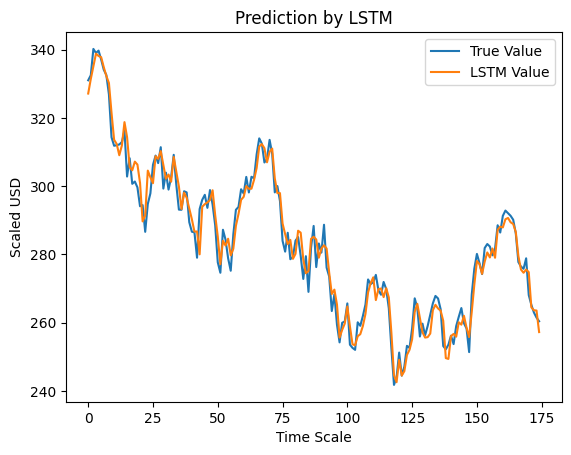

In [ ]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()